In [50]:
import pandas as pd
import numpy as np
import pycmap
import plotly.express as px

import matplotlib.pyplot as plt

import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

### Call API

#### get api key by registering for account on simonscmap.com then going to https://simonscmap.com/apikeymanagement

In [2]:
# call api using api key
key = '68485f40-0458-11ed-b189-4fe042c5db72'
api = pycmap.API(token=key)

In [3]:
# get catalog of all datasets- very long
api.get_catalog()
# search for a dataset with a specific keyword
api.search_catalog('seaflow')

,Variable,Table_Name,Long_Name,Unit,Make,Sensor,Process_Level,Study_Domain,Temporal_Resolution,Spatial_Resolution,...,Dataset_Name,Dataset_Short_Name,Data_Source,Distributor,Dataset_Description,Acknowledgement,Dataset_ID,ID,Visualize,Keywords
0,abundance_croco,tblSeaFlow,abundance of Crocospheara-like particles,cells uL-1,Observation,SeaFlow,Reprocessed,Biology+Biogeochemistry+Optics+Cytometry,Three Minutes,Irregular,...,"SeaFlow-based abundance, cell size, carbon quo...",all_SeaFlow_cruises,"SeaFlow@UW, University of Washington, https://...",http://doi.org/10.5281/zenodo.2678021,The data set consists of SeaFlow-based cell ab...,"Annette Hynes, Chris Berthiaume, E Virginia Ar...",288,3973,1,"abundance, armbrust lab, biogeochemistry, biol..."
1,abundance_picoeuk,tblSeaFlow,abundance of Picoeukaryote phytoplankton,cells uL-1,Observation,SeaFlow,Reprocessed,Biology+Biogeochemistry+Optics+Cytometry,Three Minutes,Irregular,...,"SeaFlow-based abundance, cell size, carbon quo...",all_SeaFlow_cruises,"SeaFlow@UW, University of Washington, https://...",http://doi.org/10.5281/zenodo.2678021,The data set consists of SeaFlow-based cell ab...,"Annette Hynes, Chris Berthiaume, E Virginia Ar...",288,3972,1,"abundance, armbrust lab, biogeochemistry, biol..."
2,abundance_prochloro,tblSeaFlow,abundance of Prochlorococcus-like particles,cells uL-1,Observation,SeaFlow,Reprocessed,Biology+Biogeochemistry+Optics+Cytometry,Three Minutes,Irregular,...,"SeaFlow-based abundance, cell size, carbon quo...",all_SeaFlow_cruises,"SeaFlow@UW, University of Washington, https://...",http://doi.org/10.5281/zenodo.2678021,The data set consists of SeaFlow-based cell ab...,"Annette Hynes, Chris Berthiaume, E Virginia Ar...",288,3970,1,"abundance, armbrust lab, biogeochemistry, biol..."
3,abundance_synecho,tblSeaFlow,abundance of Synechococcus-like particles,cells uL-1,Observation,SeaFlow,Reprocessed,Biology+Biogeochemistry+Optics+Cytometry,Three Minutes,Irregular,...,"SeaFlow-based abundance, cell size, carbon quo...",all_SeaFlow_cruises,"SeaFlow@UW, University of Washington, https://...",http://doi.org/10.5281/zenodo.2678021,The data set consists of SeaFlow-based cell ab...,"Annette Hynes, Chris Berthiaume, E Virginia Ar...",288,3971,1,"abundance, armbrust lab, biogeochemistry, biol..."
4,biomass_croco,tblSeaFlow,Carbon biomass of Crocospheara population,ugC L-1,Observation,SeaFlow,Reprocessed,Biology+Biogeochemistry+Optics+Cytometry,Three Minutes,Irregular,...,"SeaFlow-based abundance, cell size, carbon quo...",all_SeaFlow_cruises,"SeaFlow@UW, University of Washington, https://...",http://doi.org/10.5281/zenodo.2678021,The data set consists of SeaFlow-based cell ab...,"Annette Hynes, Chris Berthiaume, E Virginia Ar...",288,3985,1,"armbrust lab, biogeochemistry, biology, carbon..."
5,biomass_picoeuk,tblSeaFlow,Carbon biomass of Picoeukaryote phytoplankton ...,ugC L-1,Observation,SeaFlow,Reprocessed,Biology+Biogeochemistry+Optics+Cytometry,Three Minutes,Irregular,...,"SeaFlow-based abundance, cell size, carbon quo...",all_SeaFlow_cruises,"SeaFlow@UW, University of Washington, https://...",http://doi.org/10.5281/zenodo.2678021,The data set consists of SeaFlow-based cell ab...,"Annette Hynes, Chris Berthiaume, E Virginia Ar...",288,3984,1,"armbrust lab, biogeochemistry, biology, carbon..."
6,biomass_prochloro,tblSeaFlow,Carbon biomass of Prochlorococcus population,ugC L-1,Observation,SeaFlow,Reprocessed,Biology+Biogeochemistry+Optics+Cytometry,Three Minutes,Irregular,...,"SeaFlow-based abundance, cell size, carbon quo...",all_SeaFlow_cruises,"SeaFlow@UW, University of Washington, https://...",http://doi.org/10.5281/zenodo.2678021,The data set consists of SeaFlow-based cell ab...,"Annette Hynes, Chris Berthiaume, E Virginia Ar...",288,3982,1,"armbrust lab, biogeochemistry, biology, carbon..."
7,biomass_synecho,tblSeaFlow,Carbon biomass of Synechococcus population,ugC L-1,Observation,SeaFlow,Reprocessed,Biology+Biogeochemistry+Optics+Cytometry,Three Minutes,Irregular,

### Seaflow dataset

In [4]:
# read in seaflow dataset (surface level- 5m- continuous samples across 50 cruises)
seaflow = api.get_dataset('tblSeaFlow')
print(f'seaflow columns only: {seaflow.columns.values.tolist()}\n')
# can also get with ancilliary data
seaflow_all = api.get_dataset_with_ancillary("tblSeaFlow")
print(f'seaflow with ancilliary: {seaflow_all.columns.values.tolist()}')

seaflow columns only: ['time', 'lat', 'lon', 'depth', 'cruise', 'abundance_prochloro', 'abundance_synecho', 'abundance_picoeuk', 'abundance_croco', 'diam_prochloro', 'diam_synecho', 'diam_picoeuk', 'diam_croco', 'Qc_prochloro', 'Qc_synecho', 'Qc_picoeuk', 'Qc_croco', 'biomass_prochloro', 'biomass_synecho', 'biomass_picoeuk', 'biomass_croco']

seaflow with ancilliary: ['time', 'lat', 'lon', 'depth', 'cruise', 'abundance_prochloro', 'abundance_synecho', 'abundance_picoeuk', 'abundance_croco', 'diam_prochloro', 'diam_synecho', 'diam_picoeuk', 'diam_croco', 'Qc_prochloro', 'Qc_synecho', 'Qc_picoeuk', 'Qc_croco', 'biomass_prochloro', 'biomass_synecho', 'biomass_picoeuk', 'biomass_croco', 'CMAP_sst_tblSST_AVHRR_OI_NRT', 'CMAP_chl_tblCHL_REP', 'CMAP_POC_tblModis_POC', 'CMAP_AOD_tblModis_AOD_REP', 'CMAP_sss_tblSSS_NRT', 'CMAP_wind_speed_tblWind_NRT', 'CMAP_wind_stress_tblWind_NRT', 'CMAP_wind_stress_curl_tblWind_NRT', 'CMAP_PAR_tblModis_PAR', 'CMAP_sla_tblAltimetry_REP', 'CMAP_adt_tblAltimetry

0         49.942400
1         49.942400
2         49.942400
3         49.942400
4         49.942400
            ...    
150889    36.606128
150890    36.608154
150891    36.610191
150892    36.612184
150893    36.614245
Name: lat, Length: 150894, dtype: float64

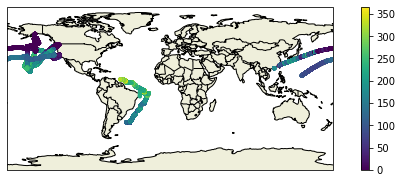

In [38]:
## example plot of prochlorococcus biomass distribution for seaflow
#fig = px.scatter_geo(seaflow, lat='lat',lon='lon',color='abundance_prochloro')
#fig.show()

plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree()); #this specifies which projection to use
ax.set_global();
ax.add_feature(cfeature.COASTLINE);
ax.add_feature(cfeature.LAND);
ax.add_feature(cfeature.BORDERS);
im=ax.scatter(seaflow['lon'],seaflow['lat'],10,c=seaflow['abundance_prochloro']);
plt.colorbar(im);



### HOT dataset

In [39]:
# read in hawaii ocean time series (HOT) data (1998-2019)
## https://simonscmap.com/catalog/datasets/HOT_PP
HOT = api.get_dataset('tblHOT_PP')
print(f'HOT columns only: {HOT.columns.values.tolist()}\n')
# this dataset also has pre-colcalized ancilliary data
HOT_all = api.get_dataset_with_ancillary("tblHOT_PP")

HOT columns only: ['time', 'lat', 'lon', 'depth', 'cruise_name', 'chl_hot', 'phaeopigments_hot', 'itype', 'light_12_hot', 'dark_12_hot', 'salinity_hot', 'prochlorococcus_hot', 'heterotrophic_bacteria_hot', 'synechococcus_hot', 'eukaryotes_hot']



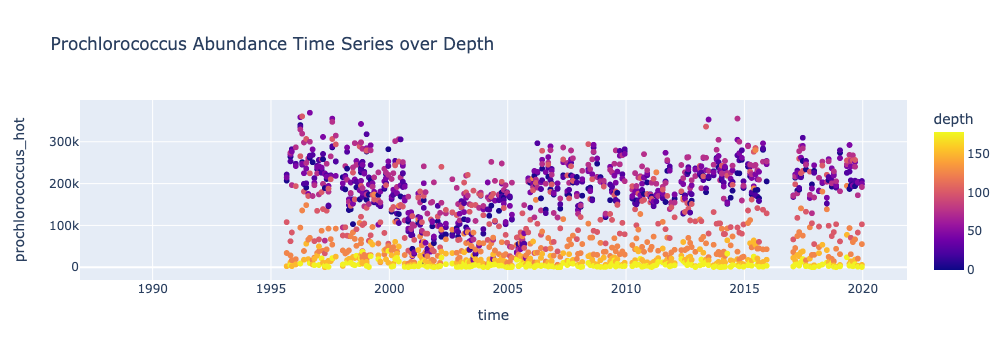

In [85]:
px.scatter(HOT, x='time',y='prochlorococcus_hot', color='depth', 
           title='Prochlorococcus Abundance Time Series over Depth')

In [ ]:
HOT['prochlorococcus_hot']

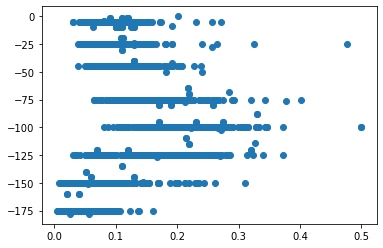

In [88]:
pro=HOT['chl_hot'];
depth=HOT['depth'];

plt.scatter(pro,-depth);
#plt.scatter(pro,-depth);


In [83]:
print([0:100])

0      24
1      42
2      68
3     114
4       0
     ... 
95     20
96     45
97     45
98     80
99     80
Name: depth, Length: 100, dtype: int64


0        24
1        42
2        68
3       114
4         0
       ... 
2424     75
2425    100
2426    125
2427    150
2428    175
Name: depth, Length: 2429, dtype: int64

### Data from Flombaum et al 2013

In [59]:
# flowcytometry data that went into Flombaum et al
fl_2013 = api.get_dataset('tblFlombaum')

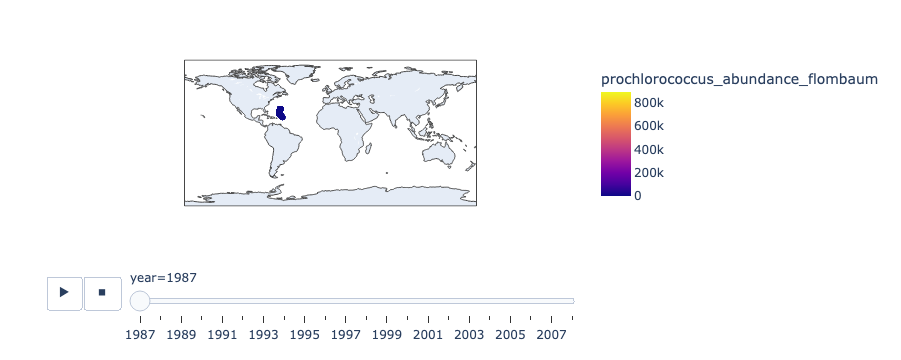

In [60]:
# lets look at prochlorococcus abundance above 50 m
fl_surface = fl_2013[fl_2013['depth']>= 50]
pro_min, pro_max = np.min(fl_surface['prochlorococcus_abundance_flombaum']), np.max(fl_surface['prochlorococcus_abundance_flombaum'])
px.scatter_geo(fl_surface, lat='lat',lon='lon',color='prochlorococcus_abundance_flombaum', 
               animation_frame='year', range_color=[pro_min, pro_max])